Stel, een klant komt naar je toe en vraagt of je overeenkomsten kan vinden tussen klanten. Deze overeenkomsten moeten alle klanten groeperen om zo de groepen beter te kunnen benaderen met bv. gepersonaliseerde reclame of aanbiedingen.

Één mogelijke manier is door gebruik te maken van een clustering algoritme. Omdat de dataset klein is en verklaarbaarheid van de data een grote rol speelt, maken we gebruik van hiërarchische clustering analyse.

Laten we beginnen met het importeren van de dataset.

In [9]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
# path_to_file = 'shopping-data.csv'
path_to_file = 'Dataset_JRC_-_biomass_data_data_data_uses_and_flows.csv'
biomass_data = pd.read_csv(path_to_file)

In [10]:
biomass_data.shape

(162756, 17)

In [11]:
biomass_data.columns

Index(['Geopolitical Entity', 'Geopolitical Entity (Id)', 'Year', 'Sector',
       'Level_Sankey', 'Level_Sankey (Id)', 'Lifecycle Step',
       'Lifecycle Step (Id)', 'Source', 'Source (Id)', 'Target', 'Target (Id)',
       'Flow', 'Flow (Id)', 'Unit', 'Unit (Id)', 'Value (THOUSAND TONS)'],
      dtype='object')

Laten we even wat verder induiken op de "spending habits" van de klanten door de spending score in een histogram te plaatsen.

In [12]:
# transpose() transposes the table, making it easier for us to compare values
biomass_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,162756.0,2013.500000,3.452063,2008.0,2010.75,2013.500000,2016.25,2019.000000
Value (THOUSAND TONS),162756.0,3546.601523,23822.060930,0.0,0.00,18.691128,717.00,952506.070339


In [13]:
biomass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162756 entries, 0 to 162755
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Geopolitical Entity       162756 non-null  object 
 1   Geopolitical Entity (Id)  162756 non-null  object 
 2   Year                      162756 non-null  int64  
 3   Sector                    162756 non-null  object 
 4   Level_Sankey              162756 non-null  object 
 5   Level_Sankey (Id)         162756 non-null  object 
 6   Lifecycle Step            162756 non-null  object 
 7   Lifecycle Step (Id)       162756 non-null  object 
 8   Source                    162756 non-null  object 
 9   Source (Id)               162756 non-null  object 
 10  Target                    162756 non-null  object 
 11  Target (Id)               162756 non-null  object 
 12  Flow                      162756 non-null  object 
 13  Flow (Id)                 162756 non-null  o

In [14]:
biomass_data.head() 

,Geopolitical Entity,Geopolitical Entity (Id),Year,Sector,Level_Sankey,Level_Sankey (Id),Lifecycle Step,Lifecycle Step (Id),Source,Source (Id),Target,Target (Id),Flow,Flow (Id),Unit,Unit (Id),Value (THOUSAND TONS)
0,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Animal based food,Animal based food,Feed & bedding,A9,Animal-based food,A13,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,546.633266
1,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Animal based food,Animal based food,Feed & bedding,A9,Animal-based food,A13,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (net trade),KT_DRY_NET,546.633266
2,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Biomass supply,A4,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,1236.146648
3,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Biomass supply,A4,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (net trade),KT_DRY_NET,0.000000
4,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Feed & bedding,A9,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,4469.214987


In [33]:
biomass_data[['Geopolitical Entity (Id)', 'Geopolitical Entity', 'Year', 'Sector', 'Value (THOUSAND TONS)']].groupby(by=['Geopolitical Entity (Id)', 'Year', 'Sector']).sum().sort_values(by='Value (THOUSAND TONS)')

/tmp/ipykernel_642/1053366239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  biomass_data[['Geopolitical Entity (Id)', 'Geopolitical Entity', 'Year', 'Sector', 'Value (THOUSAND TONS)']].groupby(by=['Geopolitical Entity (Id)', 'Year', 'Sector']).sum().sort_values(by='Value (THOUSAND TONS)')


Value (THOUSAND TONS)
Geopolitical Entity (Id) Year Sector                            
HR                       2019 Forestry              0.000000e+00
FI                       2019 Forestry              0.000000e+00
                              Fisheries             0.000000e+00
                         2018 Forestry              0.000000e+00
                              Fisheries             0.000000e+00
...                                                          ...
EU27                     2016 Agriculture           1.042083e+07
                         2018 Agriculture           1.053840e+07
                         2014 Agriculture           1.058225e+07
                         2017 Agriculture           1.078545e+07
                         2019 Agriculture           1.088741e+07

[1344 rows x 1 columns]

In [34]:
biomass_data_2018_agriculture_net_trade = biomass_data[(biomass_data['Year'] == 2018) & (biomass_data['Sector'] == 'Agriculture') & (biomass_data['Unit (Id)'] == 'KT_DRY_NET') & (~biomass_data['Geopolitical Entity'].str.startswith('European'))].groupby(by=['Geopolitical Entity', 'Geopolitical Entity (Id)', 'Year', 'Sector']).sum().reset_index().sort_values(by='Value (THOUSAND TONS)', ascending=False)
biomass_clustering = biomass_data_2018_agriculture_net_trade[['Geopolitical Entity (Id)', 'Value (THOUSAND TONS)']].copy()

/tmp/ipykernel_642/1475053772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  biomass_data_2018_agriculture_net_trade = biomass_data[(biomass_data['Year'] == 2018) & (biomass_data['Sector'] == 'Agriculture') & (biomass_data['Unit (Id)'] == 'KT_DRY_NET') & (~biomass_data['Geopolitical Entity'].str.startswith('European'))].groupby(by=['Geopolitical Entity', 'Geopolitical Entity (Id)', 'Year', 'Sector']).sum().reset_index().sort_values(by='Value (THOUSAND TONS)', ascending=False)


In [36]:
# The _oh means one-hot
biomass_data_oh = pd.get_dummies(biomass_clustering)
# Display the one-hot encoded dataframe
biomass_data_oh.columns
biomass_clustering = pd.concat([biomass_clustering['Geopolitical Entity (Id)'], biomass_data_oh], axis=1)

Het voordeel van one-hot-encoding is het versimpelen van het weergeven van kolom waardes. Het is makkelijk te lezen en te begrijpen. Het nadeel is dat er nu 8 EXTRA kolommen aan zijn gemaakt in de dataset. 

Hiermee kan een dendrogram gemaakt worden, maar eerst is het van belang om te kijken welke oorspronkelijke features tegenover elkaar geplot kunnen worden, waarbij clusters tevoorschijn kunnen komen.

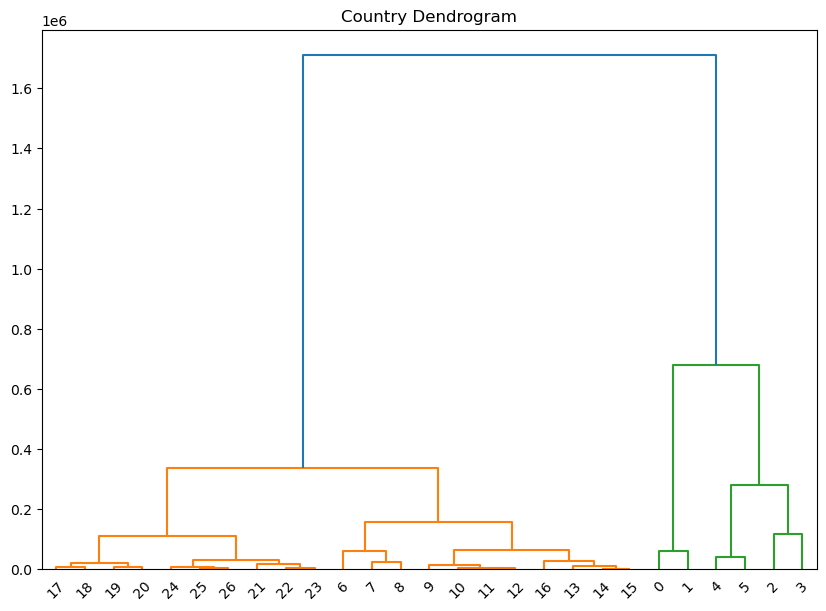

In [37]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Country Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = biomass_data_oh
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Het vinden van het aantal clusters is een beetje puzzelen. Er moet gekeken worden naar de grootste horizontale vlakte in een Dendrogram waar de grootste verticale lijnen door passeren. Twee mogelijke opties hierin zijn of een lijn trekken op een y van 350, of op een y van rond de 125. De lijn die door y = 350 passeert heeft echter niet de grootste verticale lijnen door zich heen lopen. Daarnaast hebben we met de Seaborn plots al een visuele indicatie van 5 clusters gezien. Dit betekent dat we een lijn trekken op y = 125.

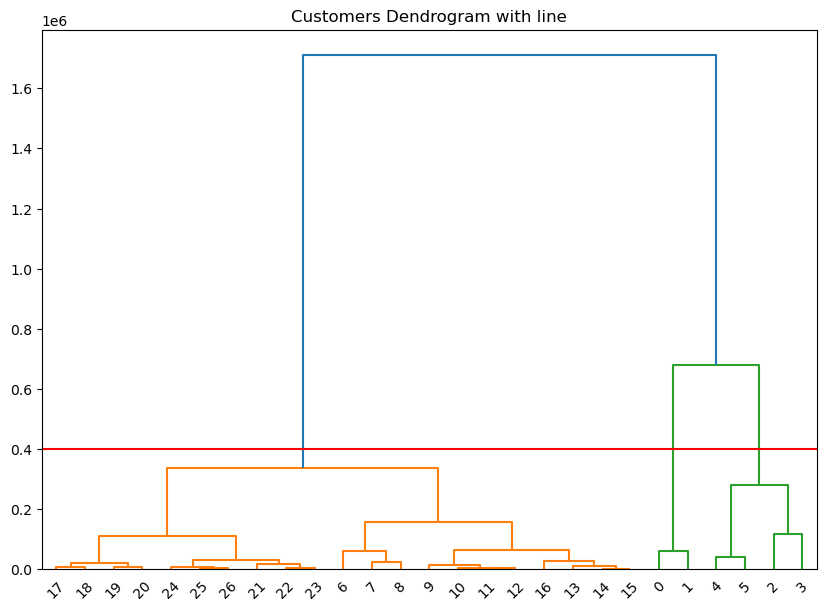

In [38]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 0.4e6, color = 'r', linestyle = '-')


In [39]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [40]:
selected_data.head()

,Value (THOUSAND TONS),Geopolitical Entity (Id)_AT,Geopolitical Entity (Id)_BE,Geopolitical Entity (Id)_BG,Geopolitical Entity (Id)_CY,Geopolitical Entity (Id)_CZ,Geopolitical Entity (Id)_DE,Geopolitical Entity (Id)_DK,Geopolitical Entity (Id)_EE,Geopolitical Entity (Id)_EL,...,Geopolitical Entity (Id)_LU,Geopolitical Entity (Id)_LV,Geopolitical Entity (Id)_MT,Geopolitical Entity (Id)_NL,Geopolitical Entity (Id)_PL,Geopolitical Entity (Id)_PT,Geopolitical Entity (Id)_RO,Geopolitical Entity (Id)_SE,Geopolitical Entity (Id)_SI,Geopolitical Entity (Id)_SK
9,956617.601662,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,896606.956103,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,665788.336188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,551432.126577,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,432112.496241,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Labeled Biomass Data')

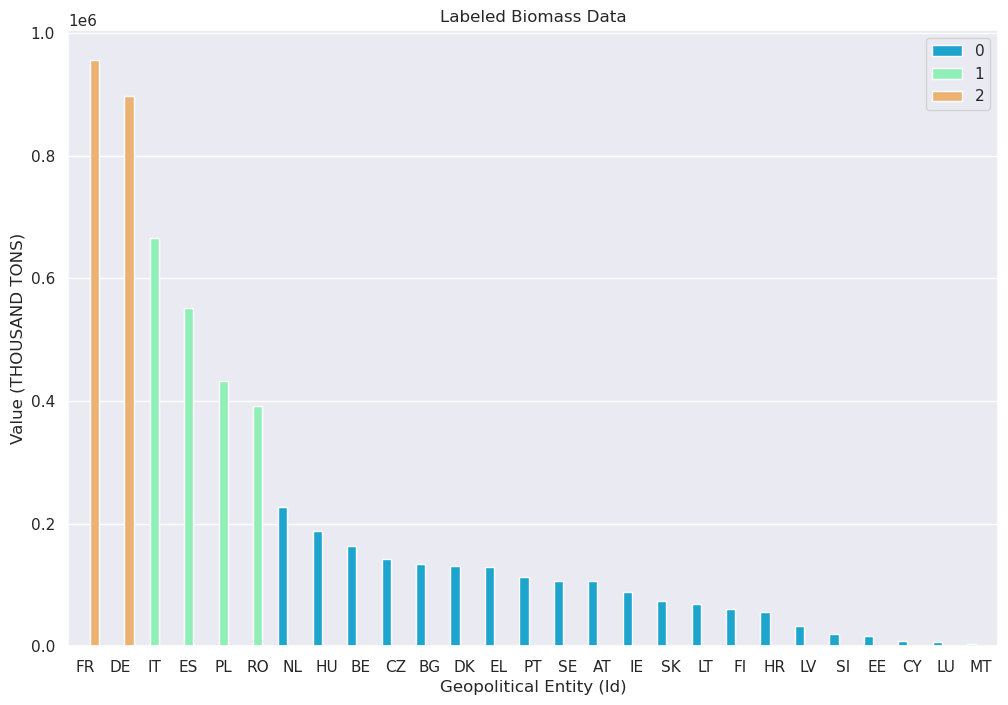

In [43]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
data_labels = clustering_model.labels_
sns.barplot(x='Geopolitical Entity (Id)', 
                y='Value (THOUSAND TONS)', 
                data=biomass_clustering, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Biomass Data')